### Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

#### Domain: Food and agriculture

### Import required libraries and read the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('honeyproduction.csv')

### Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# First Few samples
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [5]:
# Shape
df.shape

(626, 8)

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [7]:
# Null Values
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [8]:
# Duplicates
df.duplicated().sum()

0

### Display the percentage distribution of the data in each year using the pie chart.

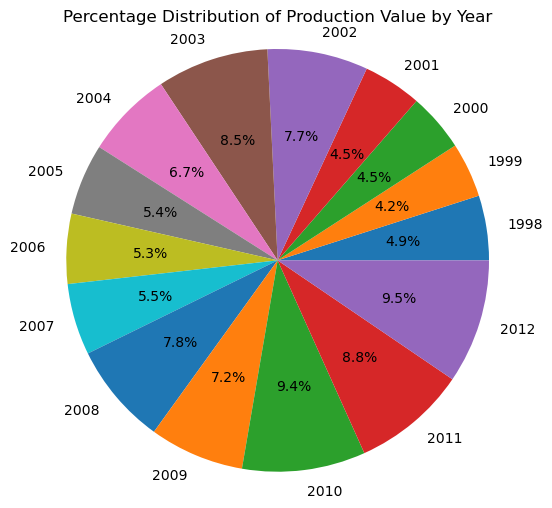

In [9]:
yearly_production = df.groupby('year')['prodvalue'].sum()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(yearly_production, labels=yearly_production.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Production Value by Year')
plt.axis('equal')
plt.show()

### Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

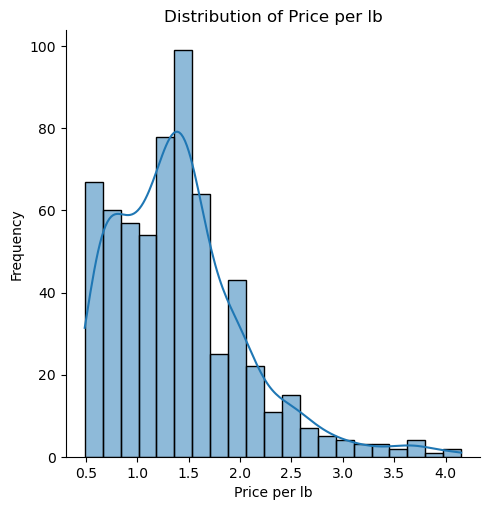

In [10]:
sns.displot(df['priceperlb'], kde=True)
plt.title('Distribution of Price per lb')
plt.xlabel('Price per lb')
plt.ylabel('Frequency')
plt.show()


### Findings

* Right-Skewed Distribution: The data shows a right-skewed distribution, with a concentration of lower prices per lb and fewer instances of higher prices.
* Central Tendency: Most prices per lb are clustered around the 1 to 1.5 range, which is the mode of the distribution.
* Decreasing Frequency: As the price per lb increases, the frequency of instances decreases, indicating that high prices are less common.
* Probability Density: The KDE plot smooths out the frequency of prices, reinforcing the skewness and central tendency observed in the histogram.

### Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings

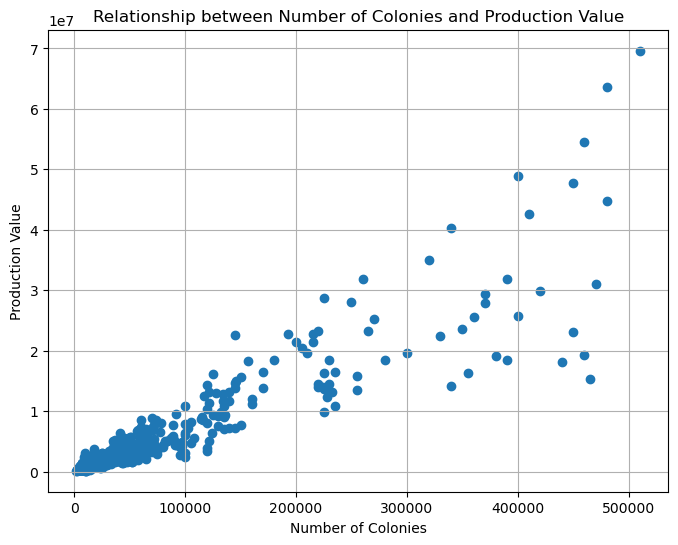

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['numcol'], df['prodvalue'])
plt.title('Relationship between Number of Colonies and Production Value')
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value')
plt.grid(True)
plt.show()

### Findings

* Positive Linear Relationship: The scatterplot indicates a positive linear relationship between the number of colonies and production value, suggesting that an increase in colonies is associated with an increase in production value.
* Correlation Observed: The data points align in a manner that suggests a correlation; as the number of colonies rises, so does the production value.
* Data Distribution: The points are not randomly scattered but show a trend, which supports the presence of a relationship between the two variables.

### Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings

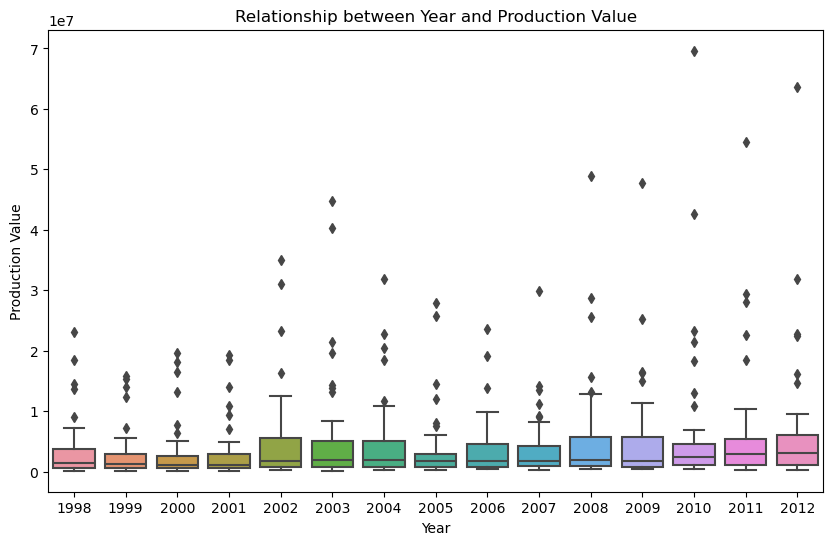

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='prodvalue', data=df)
plt.title('Relationship between Year and Production Value')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.show()

### Findings

* Central Tendency: The median production value is marked within the IQR box, providing a measure of the central tendency.
* Spread and Skewness: The IQR and whiskers illustrate the spread of data and potential skewness, with outliers indicated as individual points.
* Yearly Trends: The sequence of boxplots across years allows for the observation of trends or shifts in production values over time.
* Comparative Analysis: Differences in production values between years can be assessed, including any significant outliers.

### Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

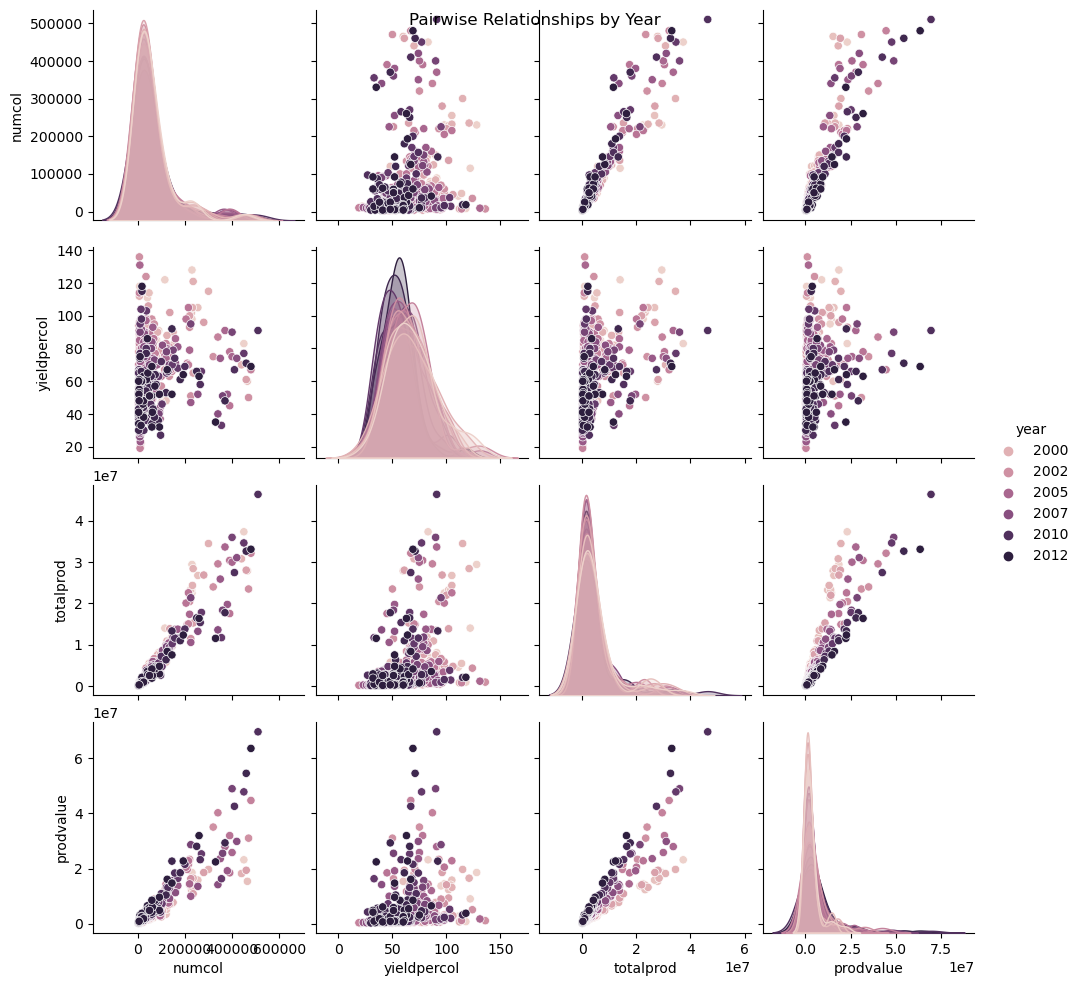

In [13]:
df_filtered = df[['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']]
sns.pairplot(df_filtered, hue='year', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Year')
plt.show()

### Inferences

* Numcol vs. Yieldpercol: The scatter plot may suggest that as the number of colonies increases, the yield per colony varies significantly, indicating that factors other than colony count may influence yield efficiency.
* Numcol vs. Totalprod: The relationship between the number of colonies and total production might not be linear, suggesting that there are diminishing returns or other influencing factors on total production as colony numbers grow.
* Numcol vs. Prodvalue: The correlation between the number of colonies and production value could indicate that while more colonies contribute to higher production value, the rate of increase may slow down beyond a certain point.
* Yieldpercol vs. Totalprod: This plot might reveal that yield per colony has a strong impact on total production, with higher yields per colony leading to significantly increased total production.
* Yieldpercol vs. Prodvalue: The influence of yield per colony on production value could show that optimizing yield per colony is crucial for maximizing economic returns in beekeeping.
* Totalprod vs. Prodvalue: The correlation between total production and production value may indicate that while total production is a key driver of production value, other factors such as market prices also play a significant role.

# Thank you